In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 df = pd.read_csv('UpdatedResumeDataSet.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [5]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [6]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

In [7]:
df_counts = df['Category'].value_counts().reset_index()
df_counts.columns = ['Category', 'count']
print(df_counts)


                     Category  count
0              Java Developer     84
1                     Testing     70
2             DevOps Engineer     55
3            Python Developer     48
4               Web Designing     45
5                          HR     44
6                      Hadoop     42
7                  Blockchain     40
8               ETL Developer     40
9          Operations Manager     40
10               Data Science     40
11                      Sales     40
12        Mechanical Engineer     40
13                       Arts     36
14                   Database     33
15     Electrical Engineering     30
16         Health and fitness     30
17                        PMO     30
18           Business Analyst     28
19           DotNet Developer     28
20         Automation Testing     26
21  Network Security Engineer     25
22              SAP Developer     24
23             Civil Engineer     24
24                   Advocate     20


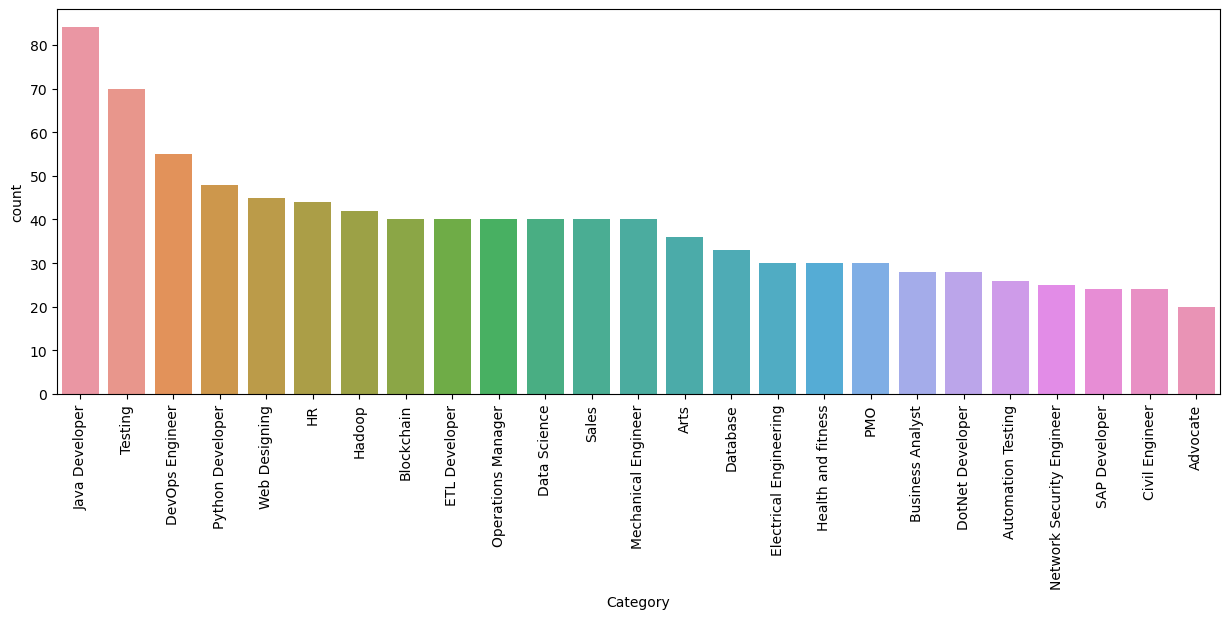

In [8]:
plt.figure(figsize=(15,5))
#sns.countplot(x=df['Category'])
sns.countplot(x=df['Category'], order=df['Category'].value_counts().index)

plt.xticks(rotation=90)
plt.show()

In [9]:
#counts = df['Category'].unique()
#print(counts)

In [10]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

([<matplotlib.patches.Wedge at 0x1f4bd00f650>,
 [Text(1.058871228953308, 0.29797939609125923, 'Data Science'),
  Text(0.7841417468169058, 0.7714413269322118, 'HR'),
  Text(0.4134731563409379, 1.0193330903024107, 'Advocate'),
  Text(0.053862331076050214, 1.098680503736666, 'Arts'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115722, 0.9404289479119671, 'Mechanical Engineer'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Sales'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Health and fitness'),
  Text(-1.0745482070561094, 0.23525762625789806, 'Civil Engineer'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Java Developer'),
  Text(-1.0485773173407904, -0.3323937567981556, 'Business Analyst'),
  Text(-0.9271404102234844, -0.5919549473825093, 'SAP Developer'),
  Text(-0.7427813690411197, -0.811341998053472, 'Automation Testing'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Electrical Engineering'),
  Text(-0.291057286964679, -1.

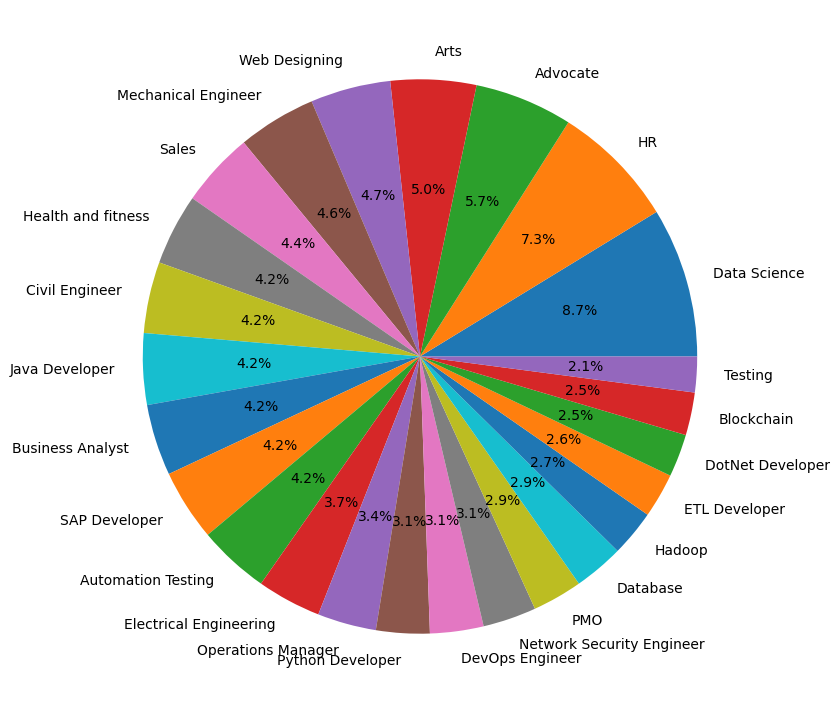

In [11]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,9))
plt.pie(counts,labels=labels,autopct='%1.1f%%',)

In [12]:
df['Category'][0]

'Data Science'

In [13]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

**Cleaning data:**
1. URls
2. hashtags
3. mentions
4. special letters
5. puntuations

In [14]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s',' ',txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [15]:
cleanResume("my website may contain  !@ $ ^ & * () $$ !! /| http and http://website-name and @you we can remove it")

'my website may contain http and and we can remove it'

In [16]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [17]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [18]:
df

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,Testing,Computer Skills Proficient in MS office Word B...
958,Testing,Willingness to a ept the challenges Positive ...
959,Testing,PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


**Words into Categorical values**

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [21]:
df.Category

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int32

In [22]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

****Vectorization****

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')

tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])

In [24]:
requiredText

<962x7351 sparse matrix of type '<class 'numpy.float64'>'
	with 164261 stored elements in Compressed Sparse Row format>

**Splitting**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=42)

In [30]:
X_train.shape

(769, 7351)

In [31]:
X_test.shape

(193, 7351)

**Now let's train the model and print the classification report:**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test,ypred))

0.9844559585492227


**Prediction System**

In [33]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf,open('clf.pkl','wb'))

In [34]:
myresume = """Certainly! Here’s a sample short resume text for a teacher:

---

**Name:** Emily Johnson  
**Email:** emily.johnson@example.com  
**Phone:** (123) 456-7890  
**Address:** 123 Elm Street, Springfield, IL 62704

---

**Objective:**  
Passionate and dedicated elementary school teacher with over 5 years of experience in creating engaging lesson plans and fostering a positive learning environment. Seeking to leverage my skills and experience to contribute to the academic success of students at Springfield Elementary School.

---

**Education:**

- **Master of Education (M.Ed.)**  
  University of Illinois, Urbana-Champaign  
  Graduated: May 2018
  
- **Bachelor of Arts in Elementary Education**  
  Illinois State University  
  Graduated: May 2015

---

**Experience:**

**Elementary Teacher**  
Lincoln Elementary School, Springfield, IL  
August 2018 – Present
- Develop and implement lesson plans that align with state curriculum standards
- Utilize diverse teaching methods to cater to different learning styles
- Foster a supportive and inclusive classroom environment
- Communicate regularly with parents and guardians about student progress

**Student Teacher**  
Jefferson Elementary School, Springfield, IL  
January 2018 – May 2018
- Assisted lead teacher in daily classroom activities
- Provided individualized support to students
- Created and executed a successful classroom management plan

---

**Skills:**
- Classroom Management
- Curriculum Development
- Differentiated Instruction
- Student Assessment
- Parent Communication
- Educational Technology

---

**Certifications:**
- Illinois Professional Educator License
- ESL Endorsement

---

**References:** Available upon request.

---

Feel free to customize this resume to fit your specific qualifications and experiences!
"""

In [35]:
import pickle

# load the trained classifer
clf = pickle.load(open('clf.pkl','rb'))

#clean the input resume
cleaned_resume = cleanResume(myresume)

#tranform the cleaned resume using the trained TfidVectorizer
input_features = tfidf.transform([cleaned_resume])

#make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

#map the category ID to Category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}
category_name = category_mapping.get(prediction_id, "Unknown")
print("predicted Category:", category_name)
print(prediction_id)

predicted Category: Arts
1
